## Imports and Setup

In [2]:
import os
import pandas as pd
import geopandas as gpd
import logging
import torch

import sys
sys.path.insert(0, "../utils/")
import model_utils
import config_utils
import embed_utils

%load_ext autoreload
%autoreload 2

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Data Configurations

In [7]:
iso_code = "SEN"
cwd = os.path.dirname(os.getcwd())
config_file = os.path.join(cwd, f"configs/model_configs/dinov2_vits14-LR.yaml")
config = config_utils.load_config(config_file)
config["iso_codes"] = [iso_code]

## Load Model

In [8]:
model = torch.hub.load("facebookresearch/dinov2", config["embed_model"])
model.name = config["embed_model"]
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model.to(device)

Using cache found in /home/itingzon.unicef/.cache/torch/hub/facebookresearch_dinov2_main
INFO:dinov2:using MLP layer as FFN


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

## Load Data

In [9]:
data = model_utils.load_data(config, attributes=["rurban", "iso"], verbose=True)
data.head(3)

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/train/SEN_train.geojson
INFO:root:
  rurban  iso       class  count  percentage
0  rural  SEN  non_school   4432    0.274904
1  rural  SEN      school   4584    0.284332
2  urban  SEN  non_school   4613    0.286131
3  urban  SEN      school   2493    0.154633
INFO:root:
                               count  percentage
rurban iso class      dataset                   
rural  SEN non_school test       870    0.269851
                      train     3562         NaN
           school     test       932    0.289082
                      train     3652         NaN
urban  SEN non_school test       911    0.282568
                      train     3702         NaN
           school     test       510    0.158189
                      train     1983         NaN
INFO:root:
                    count
dataset class            
test    non_school   1781
        school       1442
train   non_school   7264
        school       5635
INFO:root

,UID,source,iso,country,region,subregion,name,giga_id_school,clean,validated,class,ghsl_smod,rurban,dataset,geometry
0,OVERTURE-SEN-SCHOOL-00000033,OVERTURE,SEN,Senegal,Africa,Sub-Saharan Africa,École Franco-Arabe,None,0,0.0,school,30,urban,train,POINT (-1700391.061 1818789.545)
1,OVERTURE-SEN-SCHOOL-00000080,OVERTURE,SEN,Senegal,Africa,Sub-Saharan Africa,Zénith Académie,None,0,0.0,school,30,urban,train,POINT (-1709427.757 1818651.635)
2,OVERTURE-SEN-SCHOOL-00000082,OVERTURE,SEN,Senegal,Africa,Sub-Saharan Africa,International School of Dakar,None,0,0.0,school,30,urban,train,POINT (-1716311.651 1810616.456)


## Urban Schools

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex:sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex:sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


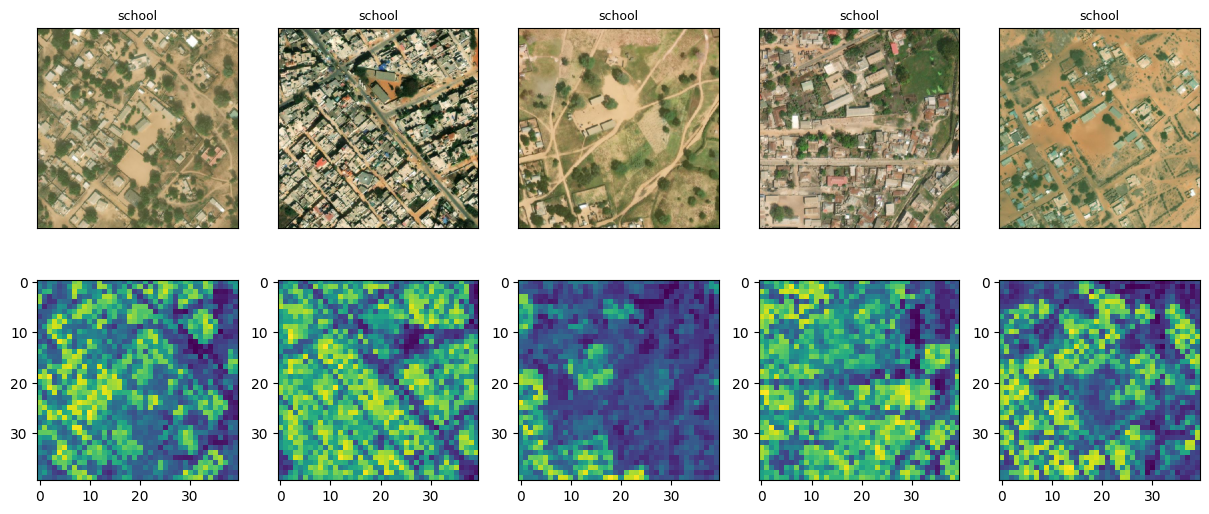

In [28]:
subdata = data[(data.rurban=="urban") & (data["class"] == "school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex:sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex:sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


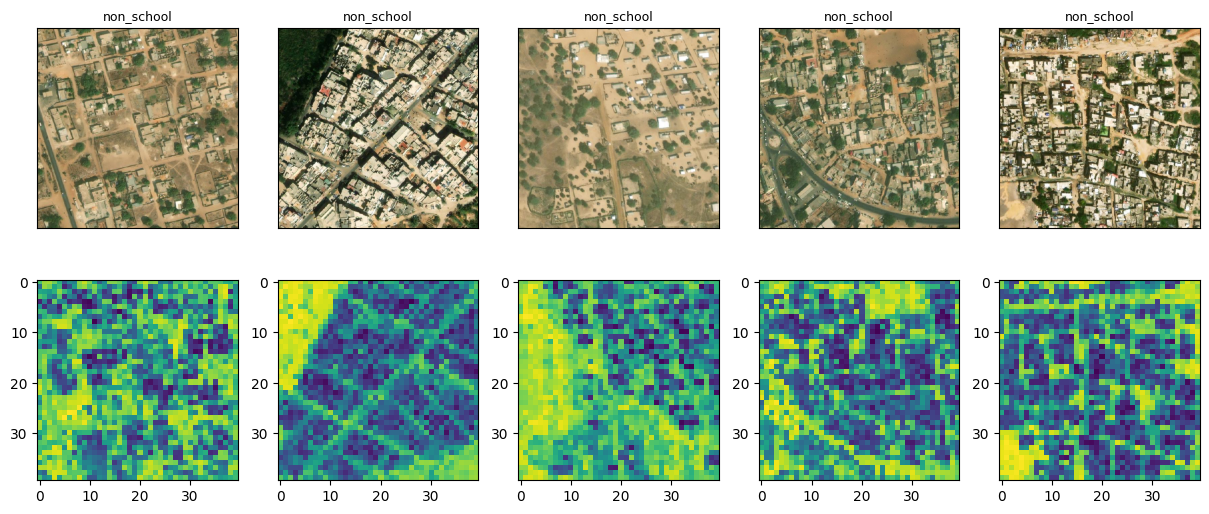

In [29]:
subdata = data[(data.rurban=="urban") & (data["class"] == "non_school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

## Rural Schools

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex:sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex:sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex:sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


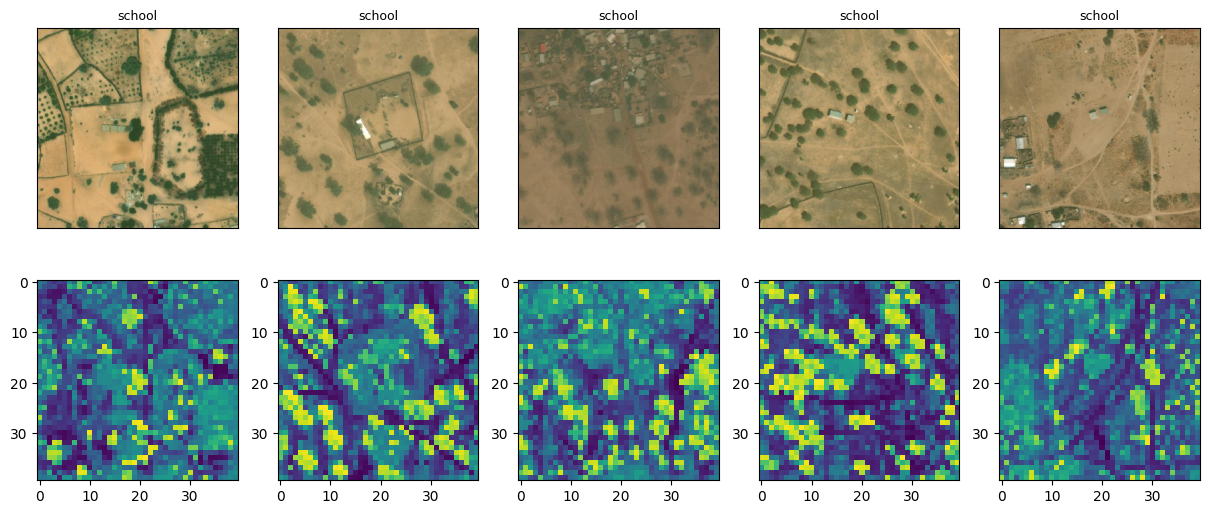

In [19]:
subdata = data[(data.rurban=="rural") & (data["class"] == "school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

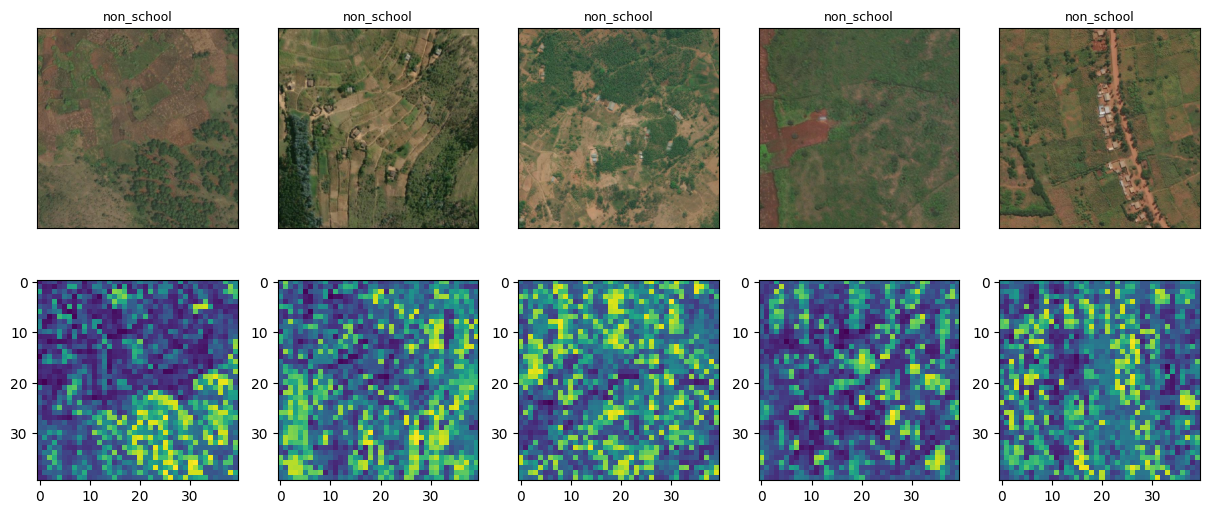

In [24]:
subdata = data[(data.rurban=="rural") & (data["class"] == "non_school")]
embed_utils.visualize_embeddings(config, subdata, model, batch_size=5)

## Compute Embeddings

In [16]:
out_dir = os.path.join(config["vectors_dir"], "embeddings")
embeddings = embed_utils.get_image_embeddings(
    config, data, model, out_dir, in_dir=None, columns=["iso", "rurban", "dataset", "class"]
)
embeddings.head(3)

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/embeddings/MNG_dinov2_vits14_embeds.csv


,UID,0,1,2,3,4,5,6,7,8,...,378,379,380,381,382,383,iso,rurban,dataset,class
0,OVERTURE-MNG-SCHOOL-00000005,-2.888033,-0.108523,5.691371,-2.143276,0.669561,-2.958966,-2.102606,0.754148,-0.106829,...,1.265511,-3.531531,-0.315876,1.205464,-2.272689,3.702338,MNG,urban,train,school
1,OVERTURE-MNG-SCHOOL-00000006,-2.589591,-0.156911,5.571325,-4.166053,0.541174,-0.911260,-2.040312,-0.669896,-1.048705,...,1.132965,-1.922010,1.084568,2.454362,-5.554929,3.728537,MNG,urban,train,school
2,OVERTURE-MNG-SCHOOL-00000018,-2.531917,0.847107,3.817045,-2.197662,2.105122,-0.644953,-2.360759,0.050235,1.632953,...,2.703199,-2.559021,-0.785523,0.349606,-3.324399,4.424771,MNG,urban,train,school
